# Lab 4 - Decision Tree and Random Forest

Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

I utilize a Stroke Prediction Dataset to construct machine learning classification models—specifically, a Decision Tree and a Random Forest. These models are aimed at predicting the likelihood of a patient experiencing a stroke (labeled as 'y'). The prediction is based on a set of features including gender, age, hypertension, heart diseases, marital status (ever_married), work type, residence type, average glucose level, BMI, and smoking status.

Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Importing the Stroke Prediction Dataset into a pandas dataframe

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AlessandroSciorilli/Stroke_Prediction_Random_Forest/main/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
df.shape

(43400, 12)

Checking the features in the dataframe

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Checking for missing data

In [5]:
df.isnull().values.any()

True

Cheking what are the missing data

In [6]:
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

### Plot 1 - Missing Values Heatmap

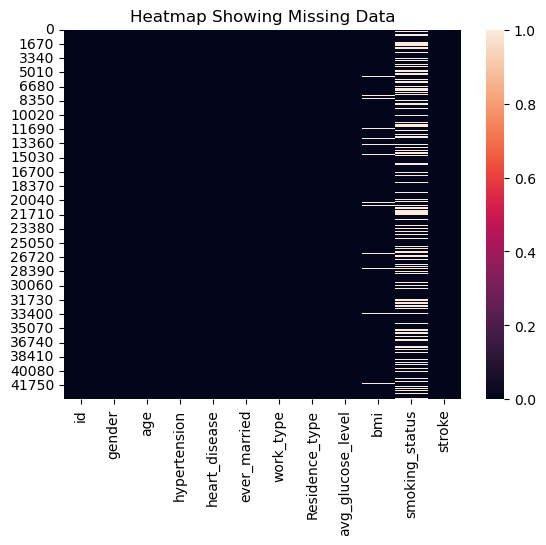

In [7]:
sns.heatmap(df.isna())
plt.title('Heatmap Showing Missing Data')
plt.show()

Removing all the rows with missing values

In [8]:
df.dropna(inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


Inspecting what data types are stored in the dataframe. The dataframe contains 3 columns of floats, 4 columns of integers and 5 columns of strings.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29072 entries, 1 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29072 non-null  int64  
 1   gender             29072 non-null  object 
 2   age                29072 non-null  float64
 3   hypertension       29072 non-null  int64  
 4   heart_disease      29072 non-null  int64  
 5   ever_married       29072 non-null  object 
 6   work_type          29072 non-null  object 
 7   Residence_type     29072 non-null  object 
 8   avg_glucose_level  29072 non-null  float64
 9   bmi                29072 non-null  float64
 10  smoking_status     29072 non-null  object 
 11  stroke             29072 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.9+ MB


Dropping **id** column - Not relevant for the analysis

In [10]:
df.drop(columns=['id'], inplace=True)

### Plot 2 - Strokes by Gender, Work Type, Residence Type and Smoking Status

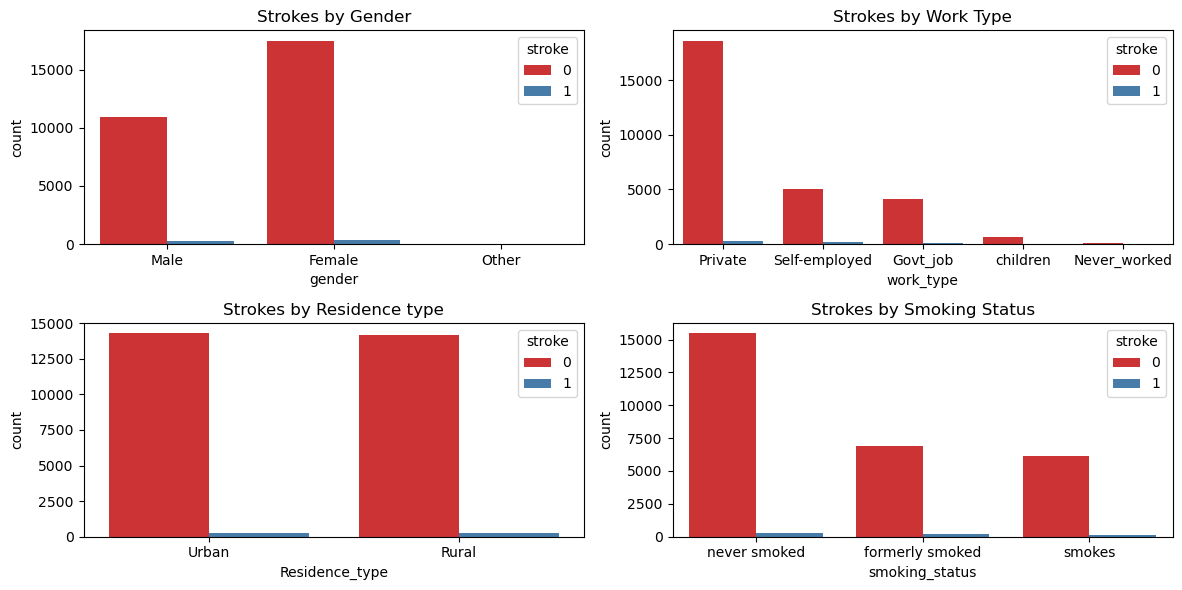

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.countplot(x='gender', hue= 'stroke', data=df, ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('Strokes by Gender')

sns.countplot(x='work_type', hue= 'stroke', data=df, ax=axes[0, 1], palette='Set1')
axes[0, 1].set_title('Strokes by Work Type')

sns.countplot(x='Residence_type', hue= 'stroke', data=df, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Strokes by Residence type')

sns.countplot(x='smoking_status', hue= 'stroke', data=df, ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('Strokes by Smoking Status')

plt.tight_layout()

plt.show()

### Plot 3 - Strokes by Age

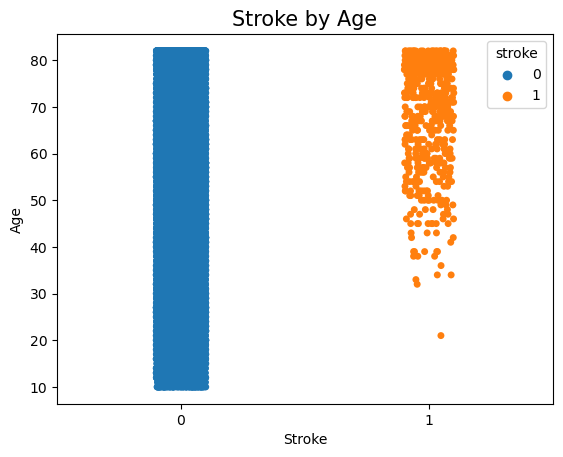

In [12]:
sns.stripplot(x= 'stroke', y = 'age', hue='stroke', data=df)
plt.ylabel('Age', fontsize='10')
plt.xlabel('Stroke', fontsize='10')
plt.title('Stroke by Age', fontsize='15')
plt.show()

To compare stroke occurrences across different categories fairly, it is necessary to compute the percentages. These percentages help comparing the impact of strokes in each group, no matter how big the groups are. With ChatGPT's help, I have written a  code to show these percentages on the bars (using for loops) and put all the graphs together in a 2x2 grid.

### Plot 4 -  Distribution of Stroke by Gender, Work Type, Residence Type and Smoking Status

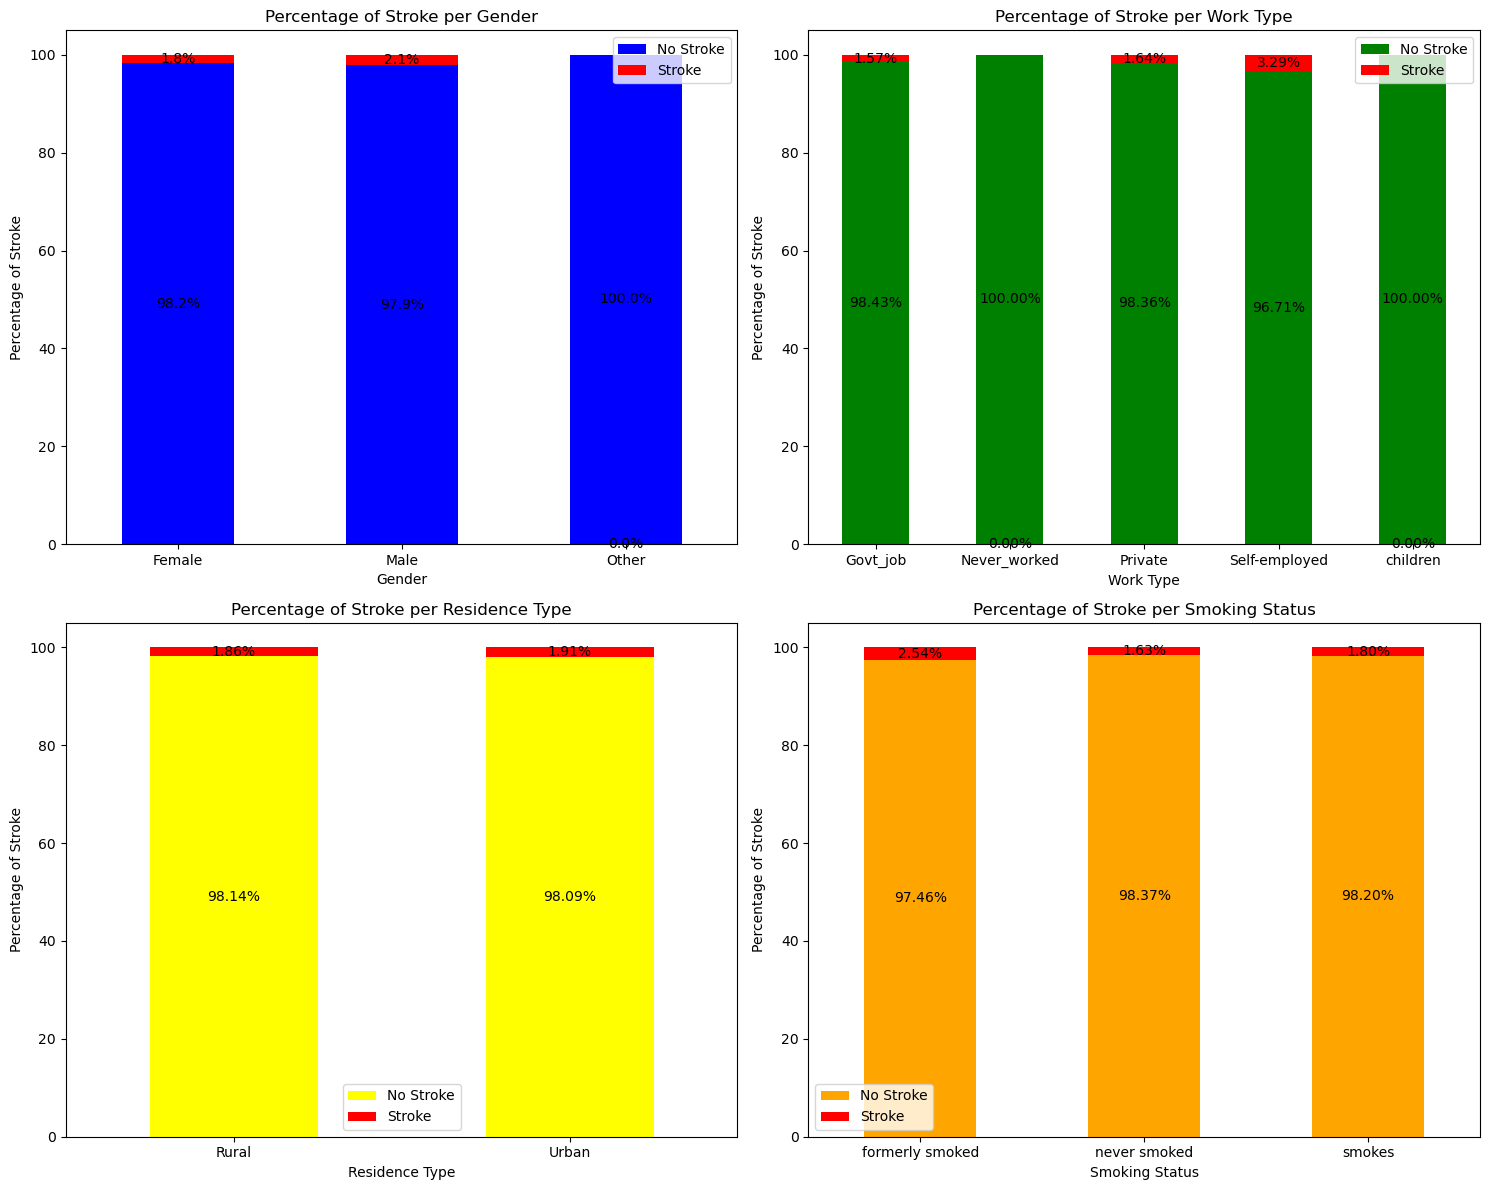

In [13]:
# Set up the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1 - Gender vs. Stroke
gender_stroke_counts = (df.groupby('gender')['stroke'].value_counts(normalize=True) * 100).unstack()
ax = gender_stroke_counts.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axs[0, 0])
ax.set_title('Percentage of Stroke per Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of Stroke')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(['No Stroke', 'Stroke'])

for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Plot 2 - Work Type vs. Stroke
gender_stroke_counts = (df.groupby('work_type')['stroke'].value_counts(normalize=True) * 100).unstack()
ax = gender_stroke_counts.plot(kind='bar', stacked=True, color=['green', 'red'], ax=axs[0, 1])
ax.set_title('Percentage of Stroke per Work Type')
ax.set_xlabel('Work Type')
ax.set_ylabel('Percentage of Stroke')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(['No Stroke', 'Stroke'])

for p in ax.patches:
    percentage = f'{p.get_height():.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Plot 3 - Residence Type vs. Stroke
gender_stroke_counts = (df.groupby('Residence_type')['stroke'].value_counts(normalize=True) * 100).unstack()
ax = gender_stroke_counts.plot(kind='bar', stacked=True, color=['yellow', 'red'], ax=axs[1, 0])
ax.set_title('Percentage of Stroke per Residence Type')
ax.set_xlabel('Residence Type')
ax.set_ylabel('Percentage of Stroke')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(['No Stroke', 'Stroke'])

for p in ax.patches:
    percentage = f'{p.get_height():.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Plot 4 - Smoking Status vs. Stroke
gender_stroke_counts = (df.groupby('smoking_status')['stroke'].value_counts(normalize=True) * 100).unstack()
ax = gender_stroke_counts.plot(kind='bar', stacked=True, color=['orange', 'red'], ax=axs[1, 1])
ax.set_title('Percentage of Stroke per Smoking Status')
ax.set_xlabel('Smoking Status')
ax.set_ylabel('Percentage of Stroke')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(['No Stroke', 'Stroke'])

for p in ax.patches:
    percentage = f'{p.get_height():.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Adjust layout
plt.tight_layout()
plt.show()


Performing **one-hot encoding** on the categorical variables **gender**, **ever_married**, **work_type**, **Residence_type**, **smoking_status**

In [14]:
gender_encoded = pd.get_dummies(df['gender'])
gender_encoded

,Female,Male,Other
1,0,1,0
3,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
...,...,...,...
43395,1,0,0
43396,1,0,0
43397,1,0,0
43398,0,1,0


In [15]:
married_encoded = pd.get_dummies(df['ever_married'])
married_encoded

,No,Yes
1,0,1
3,0,1
6,0,1
7,0,1
8,0,1
...,...,...
43395,1,0
43396,0,1
43397,0,1
43398,0,1


In [16]:
work_encoded = pd.get_dummies(df['work_type'])
work_encoded

,Govt_job,Never_worked,Private,Self-employed,children
1,0,0,1,0,0
3,0,0,1,0,0
6,0,0,1,0,0
7,0,0,0,1,0
8,0,0,1,0,0
...,...,...,...,...,...
43395,0,0,0,0,1
43396,1,0,0,0,0
43397,0,0,1,0,0
43398,0,0,1,0,0


In [17]:
residence_encoded = pd.get_dummies(df['Residence_type'])
residence_encoded

,Rural,Urban
1,0,1
3,1,0
6,0,1
7,1,0
8,1,0
...,...,...
43395,0,1
43396,0,1
43397,0,1
43398,0,1


In [18]:
smoking_encoded = pd.get_dummies(df['smoking_status'])
smoking_encoded

,formerly smoked,never smoked,smokes
1,0,1,0
3,1,0,0
6,1,0,0
7,0,1,0
8,0,0,1
...,...,...,...
43395,0,1,0
43396,1,0,0
43397,1,0,0
43398,0,1,0


Removing the columns  **gender**, **ever_married**, **work_type**, **Residence_type** and **smoking_status** from the dataframe

In [19]:
df = df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,58.0,1,0,87.96,39.2,0
3,70.0,0,0,69.04,35.9,0
6,52.0,0,0,77.59,17.7,0
7,75.0,0,1,243.53,27.0,0
8,32.0,0,0,77.67,32.3,0
...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0
43396,56.0,0,0,213.61,55.4,0
43397,82.0,1,0,91.94,28.9,0
43398,40.0,0,0,99.16,33.2,0


Concatenating the encoded values to the dataframe

In [20]:
df = pd.concat([df, gender_encoded, married_encoded,work_encoded,residence_encoded,smoking_encoded ], axis=1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,No,...,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
1,58.0,1,0,87.96,39.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6,52.0,0,0,77.59,17.7,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7,75.0,0,1,243.53,27.0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
8,32.0,0,0,77.67,32.3,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
43396,56.0,0,0,213.61,55.4,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
43397,82.0,1,0,91.94,28.9,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
43398,40.0,0,0,99.16,33.2,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


Getting the correlation of the columns

In [21]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,No,...,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
age,1.000000,0.257564,0.247434,0.228294,0.106416,0.154060,-0.040281,0.040771,-0.015231,-0.547287,...,0.031663,-0.091769,-0.163262,0.291815,-0.276333,-0.003554,0.003554,0.197916,-0.133996,-0.044512
hypertension,0.257564,1.000000,0.117980,0.154063,0.129291,0.078684,-0.036633,0.036813,-0.005497,-0.130813,...,0.001624,-0.019057,-0.048188,0.080638,-0.051401,0.002859,-0.002859,0.038819,-0.023800,-0.011745
heart_disease,0.247434,0.117980,1.000000,0.137489,0.022754,0.105149,-0.097544,0.097671,-0.003640,-0.095246,...,-0.011361,-0.013849,-0.045272,0.081780,-0.034539,0.003118,-0.003118,0.076283,-0.083575,0.021624
avg_glucose_level,0.228294,0.154063,0.137489,1.000000,0.176897,0.075452,-0.050622,0.050738,-0.003436,-0.117359,...,0.006091,-0.012166,-0.043501,0.067828,-0.046526,0.002561,-0.002561,0.054853,-0.044639,-0.003226
bmi,0.106416,0.129291,0.022754,0.176897,1.000000,-0.004029,-0.021548,0.021699,-0.004647,-0.143328,...,0.036397,-0.027741,0.013386,0.006736,-0.139578,0.002852,-0.002852,0.051813,-0.039367,-0.006445
stroke,0.154060,0.078684,0.105149,0.075452,-0.004029,1.000000,-0.012213,0.012283,-0.002151,-0.047738,...,-0.009424,-0.008184,-0.024573,0.048102,-0.020410,-0.001967,0.001967,0.027192,-0.020725,-0.003304
Female,-0.040281,-0.036633,-0.097544,-0.050622,-0.021548,-0.012213,1.000000,-0.999492,-0.019575,0.024675,...,-0.001931,-0.008430,0.021223,-0.013193,-0.026903,0.006392,-0.006392,-0.071253,0.104424,-0.052213
Male,0.040771,0.036813,0.097671,0.050738,0.021699,0.012283,-0.999492,1.000000,-0.012297,-0.025038,...,0.001933,0.008460,-0.021142,0.013425,0.025998,-0.006465,0.006465,0.070556,-0.104040,0.052477
Other,-0.015231,-0.005497,-0.003640,-0.003436,-0.004647,-0.002151,-0.019575,-0.012297,1.000000,0.011321,...,-0.000065,-0.000916,-0.002624,-0.007246,0.028479,0.002280,-0.002280,0.022142,-0.012421,-0.008101
No,-0.547287,-0.130813,-0.095246,-0.117359,-0.143328,-0.047738,0.024675,-0.025038,0.011321,1.000000,...,-0.065317,0.093151,0.066557,-0.132019,0.252410,0.005055,-0.005055,-0.101836,0.100637,-0.015587


### Plot 5 - Correlation Matrix

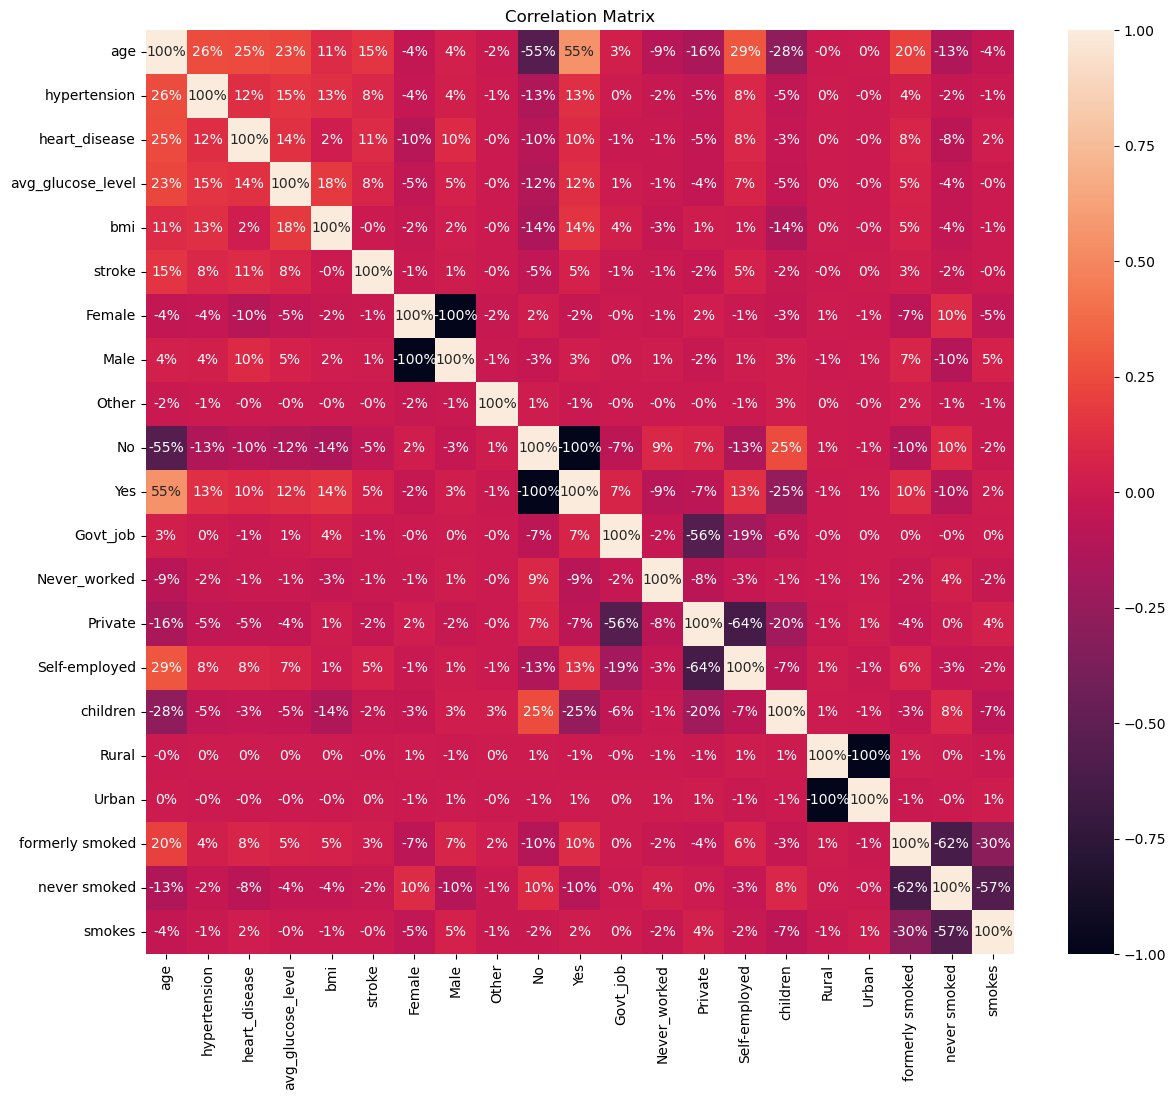

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(14, 12)) 
sns.heatmap(corr_matrix, annot=True, fmt='.0%')
plt.title('Correlation Matrix')
plt.show()

Checking the number of individuals who experienced a stroke and those who did not

### Plot 6 - Stroke Data Distribution

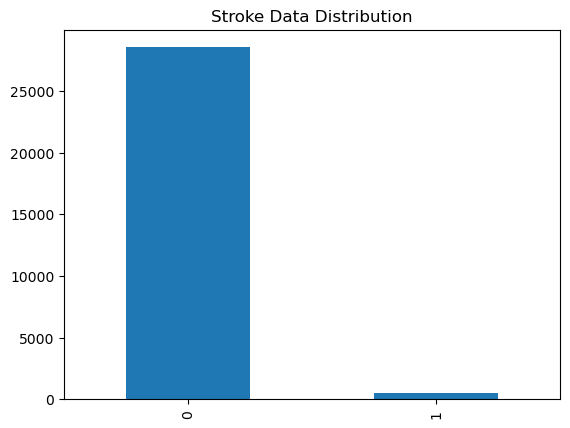

In [23]:
df['stroke'].value_counts().plot(kind='bar').set_title('Stroke Data Distribution');

The dataset is strongly unbalance toward the individuals with no stroke. To avoid a biased model performance, I rebalance the dataset by randomly selecting 500 samples from each class (0 and 1). To keep the same sequence of random numbers every time I run the code, I set a random seed = 15.

In [24]:
Samplesize = 500     
np.random.seed(15)
df = df.groupby('stroke', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:])

### Plot 7 - Rebalanced Stroke Data Distribution

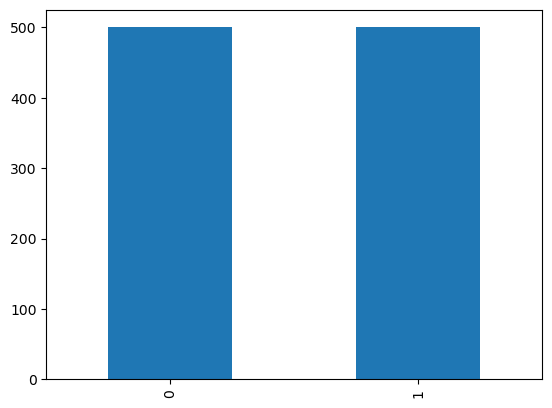

In [25]:
df['stroke'].value_counts().plot(kind='bar');

Separating the features from the labels

In [26]:
X = df[['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'Female',
 'Male',
 'Other',
 'No',
 'Yes',
 'Govt_job',
 'Never_worked',
 'Private',
 'Self-employed',
 'children',
 'Rural',
 'Urban',
 'formerly smoked',
 'never smoked',
 'smokes']].values
y = df[['stroke']].values

Splitting the dataset into training and tests sets in the ratio 70/30

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 30)

Feature Scaling

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Decision Tree

Creating and Training the Decision Tree classifier model

In [29]:
dt = DecisionTreeClassifier(random_state=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

Performing 5-Fold Cross Validation

In [30]:
k = 5
kf = KFold(n_splits=k)
result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6571428571428571


Getting the Parameters of the Decision Tree

In [31]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 15,
 'splitter': 'best'}

Decision Tree - Making Predictions

In [32]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1], d

Decision Tree - Generating Classification Report

In [33]:
print(classification_report(y_test, y_pred_dt, target_names = ['no stroke', 'stroke']))

              precision    recall  f1-score   support

   no stroke       0.66      0.75      0.71       138
      stroke       0.76      0.67      0.71       162

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.72      0.71      0.71       300



Printing the accuracy using the accuracy_score method

In [34]:
print(accuracy_score(y_test, y_pred_dt))

0.71


#### Checking which feature is more likely to indicate a presence of stroke using a decision tree

Getting the coefficients of the different features

In [35]:
dt.feature_importances_

array([0.40444633, 0.02568952, 0.02723416, 0.18684972, 0.170499  ,
       0.01668628, 0.0226065 , 0.        , 0.01014798, 0.00204322,
       0.01129637, 0.        , 0.01811047, 0.02517761, 0.        ,
       0.01629021, 0.        , 0.02872678, 0.0106096 , 0.02358625])

Storing the column names in a variable

In [36]:
feature_names = df[['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'Female',
 'Male',
 'Other',
 'No',
 'Yes',
 'Govt_job',
 'Never_worked',
 'Private',
 'Self-employed',
 'children',
 'Rural',
 'Urban',
 'formerly smoked',
 'never smoked',
 'smokes']]

In [45]:
type(feature_names)

pandas.core.frame.DataFrame

Building a dataframe with the features and their corresponding rank

In [37]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names.columns).sort_values(0,ascending=False)

The 'age' feature is considered the most important

In [38]:
feature_importance

,0
age,0.404446
avg_glucose_level,0.186850
bmi,0.170499
formerly smoked,0.028727
heart_disease,0.027234
hypertension,0.025690
Self-employed,0.025178
smokes,0.023586
Male,0.022606
Private,0.018110


### 8 - Bar Plot Depicting Feature Importance

<Axes: title={'center': 'feature importance via mean decrease in impurity'}>

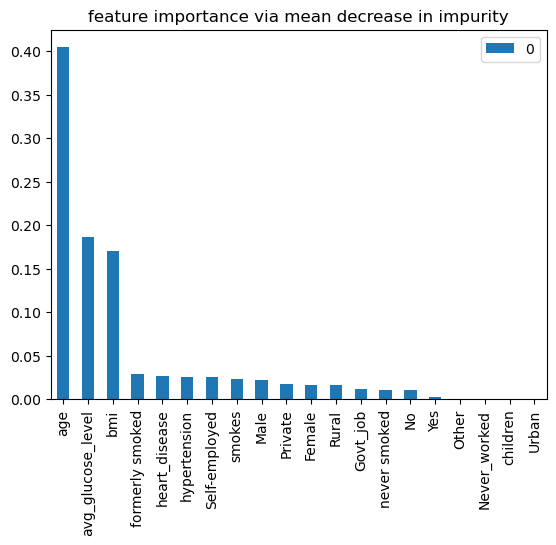

In [39]:
feature_importance.plot(kind='bar', title='feature importance via mean decrease in impurity')

### Random Forest

Creating and Training the Random Forest Classifier

In [40]:
rf = RandomForestClassifier(random_state=15)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=15)

Performing 5-Fold Cross Validation

In [41]:
result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7385714285714287


Random Forest - Making Predictions and Generating Classification Report 

In [42]:
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names = ['no stroke', 'stroke']))

              precision    recall  f1-score   support

   no stroke       0.74      0.78      0.76       138
      stroke       0.80      0.77      0.79       162

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



Cheking feature importance via a Random Forest

In [43]:
feature_importance = pd.DataFrame(rf.feature_importances_, index = feature_names.columns).sort_values(0,ascending=False)
feature_importance

,0
age,0.344794
avg_glucose_level,0.182827
bmi,0.174054
hypertension,0.051402
heart_disease,0.028230
No,0.023801
Self-employed,0.020353
Private,0.019795
never smoked,0.019503
formerly smoked,0.019279
